In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
n_steps = 1000
freq1, freq2, offsets1, offsets2 = np.random.rand(4, 1)
time = np.linspace(0, 4, n_steps)
series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
series += 0.1 * (np.random.rand(n_steps) - 0.5)   # + noise
ts = pd.date_range(start='1/1/2022', periods=n_steps, freq='T')
df = pd.DataFrame(series, index=ts, columns=['value'])

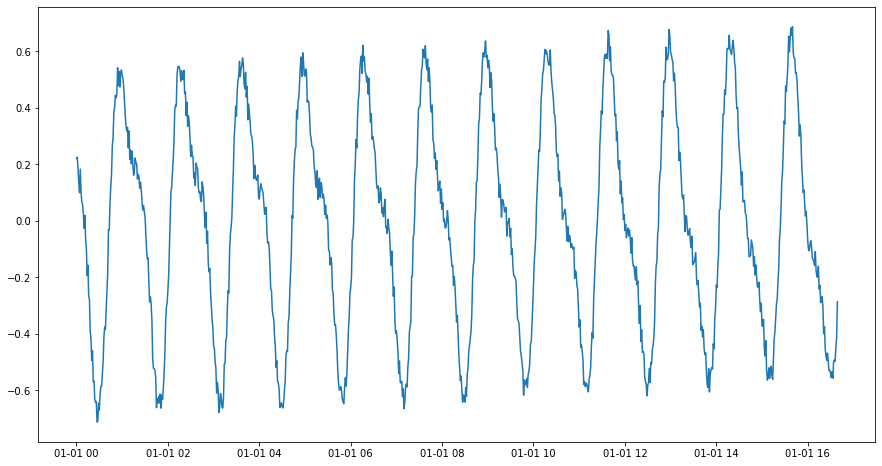

In [101]:
plt.figure(figsize=(15,8))
plt.plot(df['value'])
plt.show()

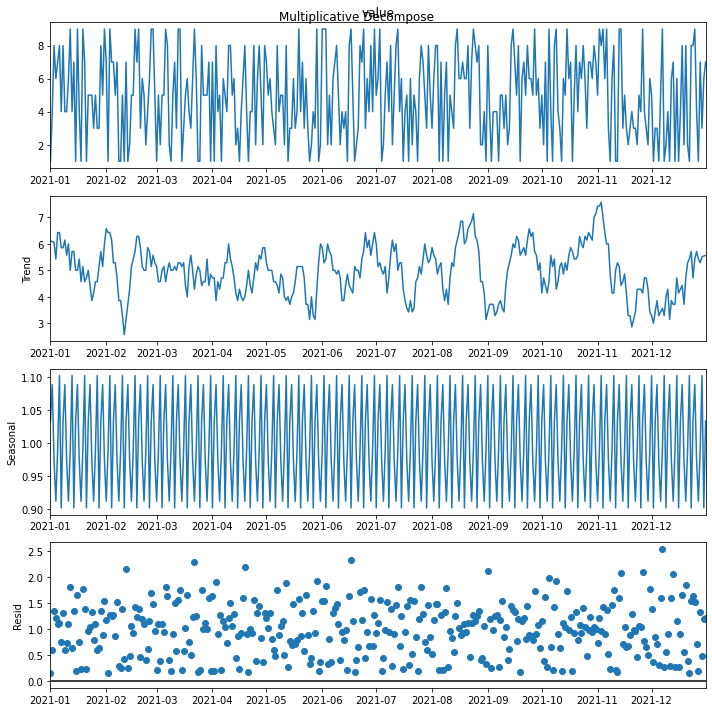

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.DataFrame(np.random.randint(1, 10, size=(365, 1)), columns=['value'],
        index=pd.date_range('2021-01-01', periods=365, freq='D'))
result_mul = seasonal_decompose(df['value'],
             model='multiplicative',
             extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot().suptitle('Multiplicative Decompose')
plt.show()

In [106]:
from scipy.fftpack import fft, fftfreq

fft_series = fft(df["value"].values)
power = np.abs(fft_series)
sample_freq = fftfreq(fft_series.size)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

top_k_seasons = 3
# top K=3 index
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods}")

top_k_power: [ 96.38791361 151.38063195 165.9976621 ]
fft_periods: [40 83 76]


In [111]:
ts.append(pd.Series([3.0]), ignore_index=True)

0       0.221909
1       0.225406
2       0.187198
3       0.135070
4       0.099648
          ...   
996    -0.496838
997    -0.445764
998    -0.412353
999    -0.286123
1000    3.000000
Length: 1001, dtype: float64

In [108]:
ts.head()

2022-01-01 00:00:00    0.221909
2022-01-01 00:01:00    0.225406
2022-01-01 00:02:00    0.187198
2022-01-01 00:03:00    0.135070
2022-01-01 00:04:00    0.099648
Freq: T, Name: value, dtype: float64